In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'test data')

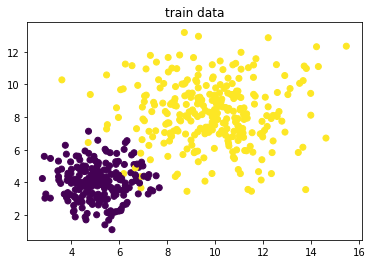

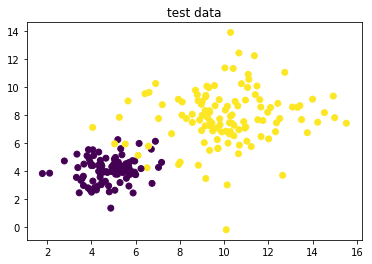

In [2]:
np.random.seed(314)
x1 = np.random.normal(loc = 5, scale = 1, size = 300)
y1 = np.random.normal(loc = 4, scale = 1, size = 300)
z1 = np.array([0 for i in range(300)])

x2 = np.random.normal(loc = 10, scale = 2, size = 400)
y2 = np.random.normal(loc = 8, scale = 2, size = 400)
z2 = np.array([1 for i in range(400)])

data_1 = np.hstack((x1.reshape(-1,1), y1.reshape(-1,1)))
data_2 = np.hstack((x2.reshape(-1,1), y2.reshape(-1,1)))
data = np.vstack((data_1, data_2))
label = np.hstack((z1, z2))

shuffle_index = np.random.permutation(700)
data = data[shuffle_index]
label = label[shuffle_index]

seperate_train_test = 700*0.7
data_train = data[:int(seperate_train_test)]
label_train = label[:int(seperate_train_test)]
data_test = data[int(seperate_train_test):]
label_test = label[int(seperate_train_test):]

plt.scatter(data_train[:,0], data_train[:,1], c = label_train)
plt.title("train data")
plt.figure()
plt.scatter(data_test[:,0], data_test[:,1], c = label_test)
plt.title("test data")

In [3]:
class KNN():
    
    def __init__(self, k, data_train, label_train):
        self.data_train = data_train
        self.label_train = label_train
        self.k = k
    
    def predict(self, data):
        pred = []
        for i in range(len(data)):
            dist_indv = [((data[i] - self.data_train[j])[0]**2 + (data[i] - self.data_train[j])[1]**2) for j in range(len(self.data_train))]
            
            sorted_index = np.argsort(np.array(dist_indv))
            #print(sorted_index)
            kn_index = sorted_index[:self.k]
            #print(kn_index)
            a = 0
            for l in range(self.k):
                a += self.label_train[kn_index[l]]
                #print(a)
            if a < 0.5*self.k:
                pred_ind = 0
            else: pred_ind = 1
            pred.append(pred_ind)
        return np.array(pred)
            
    def score(self, predict_data, real_label):
        sco = 0
        for i in range(len(predict_data)):
            if predict_data[i] == real_label[i]:
                sco += 1
        return sco/len(predict_data)

In [4]:
knn = KNN(3, data_train, label_train)

train_predict = knn.predict(data_train)
score_train = knn.score(train_predict, label_train)
print(score_train)

test_predict = knn.predict(data_test)
score_test = knn.score(test_predict, label_test)
print(score_test)

0.9856850715746421
0.966824644549763
